# ЛР №2

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [5]:
# Кодируем признаки Pclass и Embarked в отдельные столбцы
data = pd.get_dummies(data, columns=['lunch','race/ethnicity'])

In [6]:
# Пол кодируем в 1/0
data['sex']=data.gender.replace({'female':0,'male':1})
data.drop('gender', axis = 1, inplace = True)

In [7]:
data.head()

,parental level of education,test preparation course,math score,reading score,writing score,lunch_free/reduced,lunch_standard,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,sex
0,bachelor's degree,none,72,72,74,0,1,0,1,0,0,0,0
1,some college,completed,69,90,88,0,1,0,0,1,0,0,0
2,master's degree,none,90,95,93,0,1,0,1,0,0,0,0
3,associate's degree,none,47,57,44,1,0,1,0,0,0,0,1
4,some college,none,76,78,75,0,1,0,0,1,0,0,1


### Масштабирование значений

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler, Normalizer

In [9]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['math score']])

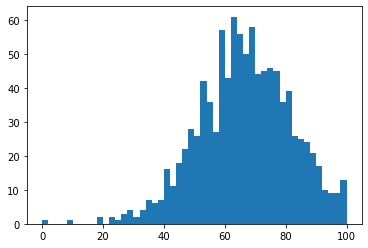

In [10]:
plt.hist(data['math score'], 50)
plt.show()

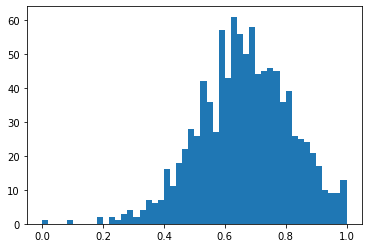

In [11]:
plt.hist(sc1_data, 50)
plt.show()

In [12]:
# Удаляем столбцы, которые не несут значимой информации
data.drop(['test preparation course','parental level of education'], axis = 1, inplace = True)

In [13]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['writing score']])

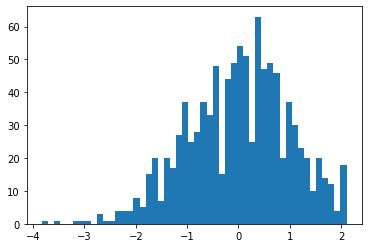

In [14]:
plt.hist(sc2_data, 50)
plt.show()

In [15]:
data.head()

,math score,reading score,writing score,lunch_free/reduced,lunch_standard,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,sex
0,72,72,74,0,1,0,1,0,0,0,0
1,69,90,88,0,1,0,0,1,0,0,0
2,90,95,93,0,1,0,1,0,0,0,0
3,47,57,44,1,0,1,0,0,0,0,1
4,76,78,75,0,1,0,0,1,0,0,1
